**Review**
	  
Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a pretty good job overall, there's just one small problem that needs to be fixed before the project can be accepted. Good luck!

<div class="alert alert-info">
  Hi Dmitry, thank you for reviewing my project :)
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
You're welcome! :)
    
Thanks for taking the time to improve the project! Now it's accepted, and you can move on to the next sprint! Keep up the good work!
	  
</div>

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

## Project instructions

1. Download and look at the data.
2. Train different models with various hyperparameters (You should make at least two different models, but more is better. Remember, various implementations of gradient boosting don't count as different models.) The main point of this step is to compare gradient boosting methods with random forest, decision tree, and linear regression.
3. Analyze the speed and quality of the models.

Notes:

* Use the RMSE metric to evaluate the models.
* Linear regression is not very good for hyperparameter tuning, but it is perfect for doing a sanity check of other methods. If gradient boosting performs worse than linear regression, something definitely went wrong.
* On your own, work with the LightGBM library and use its tools to build gradient boosting models.
* Ideally, your project should include linear regression for a sanity check, a tree-based algorithm with hyperparameter tuning (preferably, random forrest), LightGBM with hyperparameter tuning (try a couple of sets), and CatBoost and XGBoost with hyperparameter tuning (optional).
* Take note of the encoding of categorical features for simple algorithms. LightGBM and CatBoost have their implementation, but XGBoost requires OHE.
* You can use a special command to find the cell code runtime in Jupyter Notebook. Find that command.
* Since the training of a gradient boosting model can take a long time, change only a few model parameters.
* If Jupyter Notebook stops working, delete the excessive variables by using the `del` operator:

  `del features_train`
   

## Data description
The dataset is stored in file /datasets/car_data.csv. 

**Features**

* *DateCrawled* — date profile was downloaded from the database
* *VehicleType* — vehicle body type
* *RegistrationYear* — vehicle registration year
* *Gearbox* — gearbox type
* *Power* — power (hp)
* *Model* — vehicle model
* *Mileage* — mileage (measured in km due to dataset's regional specifics)
* *RegistrationMonth* — vehicle registration month
* *FuelType* — fuel type
* *Brand* — vehicle brand
* *NotRepaired* — vehicle repaired or not
* *DateCreated* — date of profile creation
* *NumberOfPictures* — number of vehicle pictures
* *PostalCode* — postal code of profile owner (user)
* *LastSeen* — date of the last activity of the user

**Target**

*Price* — price (Euro)

### Project evaluation
We’ve put together the evaluation criteria for the project. Read this carefully before moving on to the task.
Here’s what the reviewers will look at when reviewing your project:

* Have you followed all the steps of the instructions?
* How did you prepare the data?
* What models and hyperparameters have you considered?
* Have you managed to avoid code duplication?
* What are your findings?
* Have you kept to the project structure?
* Have you kept the code neat?

You have your takeaway sheets and chapter summaries, so you are ready to proceed to the project.
Good luck!

## Data preparation

In [67]:
! pip install sidetable

Defaulting to user installation because normal site-packages is not writeable


### Imports

In [68]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import sidetable as stb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from catboost import CatBoostRegressor
import xgboost as xgb

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [69]:
df = pd.read_csv('/datasets/car_data.csv')
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [70]:
df.columns = df.columns.str.lower()
df.columns

Index(['datecrawled', 'price', 'vehicletype', 'registrationyear', 'gearbox',
       'power', 'model', 'mileage', 'registrationmonth', 'fueltype', 'brand',
       'notrepaired', 'datecreated', 'numberofpictures', 'postalcode',
       'lastseen'],
      dtype='object')

### Info

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   datecrawled        354369 non-null  object
 1   price              354369 non-null  int64 
 2   vehicletype        316879 non-null  object
 3   registrationyear   354369 non-null  int64 
 4   gearbox            334536 non-null  object
 5   power              354369 non-null  int64 
 6   model              334664 non-null  object
 7   mileage            354369 non-null  int64 
 8   registrationmonth  354369 non-null  int64 
 9   fueltype           321474 non-null  object
 10  brand              354369 non-null  object
 11  notrepaired        283215 non-null  object
 12  datecreated        354369 non-null  object
 13  numberofpictures   354369 non-null  int64 
 14  postalcode         354369 non-null  int64 
 15  lastseen           354369 non-null  object
dtypes: int64(7), object(

We have some object data types here, we'll deal with them later.

### Description

In [72]:
df.describe(include='all')

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
count,354369,354369.000000,316879,354369.000000,334536,354369.000000,334664,354369.000000,354369.000000,321474,354369,283215,354369,354369.0,354369.000000,354369
unique,15470,NaN,8,NaN,2,NaN,250,NaN,NaN,7,40,2,109,NaN,NaN,18592
top,05/03/2016 14:25,NaN,sedan,NaN,manual,NaN,golf,NaN,NaN,petrol,volkswagen,no,03/04/2016 00:00,NaN,NaN,07/04/2016 07:16
freq,66,NaN,91457,NaN,268251,NaN,29232,NaN,NaN,216352,77013,247161,13719,NaN,NaN,654
mean,NaN,4416.656776,NaN,2004.234448,NaN,110.094337,NaN,128211.172535,5.714645,NaN,NaN,NaN,NaN,0.0,50508.689087,NaN
std,NaN,4514.158514,NaN,90.227958,NaN,189.850405,NaN,37905.341530,3.726421,NaN,NaN,NaN,NaN,0.0,25783.096248,NaN
min,NaN,0.000000,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,1050.000000,NaN,1999.000000,NaN,69.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30165.000000,NaN
50%,NaN,2700.000000,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49413.000000,NaN
75%,NaN,6400.000000,NaN,2008.000000,NaN,143.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71083.000000,NaN


We can see that we have NaNs all over the place...

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
The data was loaded and inspected
	  
</div>

### Duplicates

In [73]:
df.duplicated().sum()/len(df) * 100

0.07393423239617461

We have less than 1% of duplicates, we'll get rid of them:

In [74]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

No duplicates :)

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Duplicates were removed
	  
</div>

### Missing values

In [75]:
df.stb.missing().head()

,missing,total,percent
notrepaired,71145,354107,20.091385
vehicletype,37484,354107,10.585501
fueltype,32889,354107,9.287871
gearbox,19830,354107,5.600002
model,19701,354107,5.563573


We have a lot of miising values, let's fill them:

In [76]:
df.notrepaired.fillna('no', inplace=True)
df.vehicletype.fillna('sedan', inplace=True)
df.fueltype.fillna('petrol', inplace=True)
df.gearbox.fillna('manual', inplace=True)
df.model.fillna('golf', inplace=True)

df.price.fillna(df.price.mean(), inplace=True)
df.registrationyear.fillna(int(df.registrationyear.median()), inplace=True)
df.power.fillna(int(df.power.mean()), inplace=True)
df.mileage.fillna(df.mileage.mean(), inplace=True)
df.registrationmonth.fillna(df.registrationmonth.mode(), inplace=True)

In [77]:
df.stb.missing().head()

,missing,total,percent
datecrawled,0,354107,0.0
price,0,354107,0.0
vehicletype,0,354107,0.0
registrationyear,0,354107,0.0
gearbox,0,354107,0.0


No missing values here :)

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
Would be nice if you explained how you filled the missing values for categorical features. I guess those are the most common values?
	  
</div>

<div class="alert alert-info">
  Yes, you're right :)
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Ok!
	  
</div>

### Dropping unnecessary columns

It seems that dates and postal codes columns don't have added value for us. We'll drop them:

In [78]:
columns = ['datecrawled', 'datecreated', 'postalcode', 'lastseen', 'numberofpictures']
df.drop(columns, axis=1, inplace=True)
df.columns

Index(['price', 'vehicletype', 'registrationyear', 'gearbox', 'power', 'model',
       'mileage', 'registrationmonth', 'fueltype', 'brand', 'notrepaired'],
      dtype='object')

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
Ok, makes sense. There's another useless column: `NumberOfPictures`, which is a constant 0 (see the distribution below)
	  
</div>

<div class="alert alert-info">
  Thanks, corrected :)
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Great!
	  
</div>

### Distributions

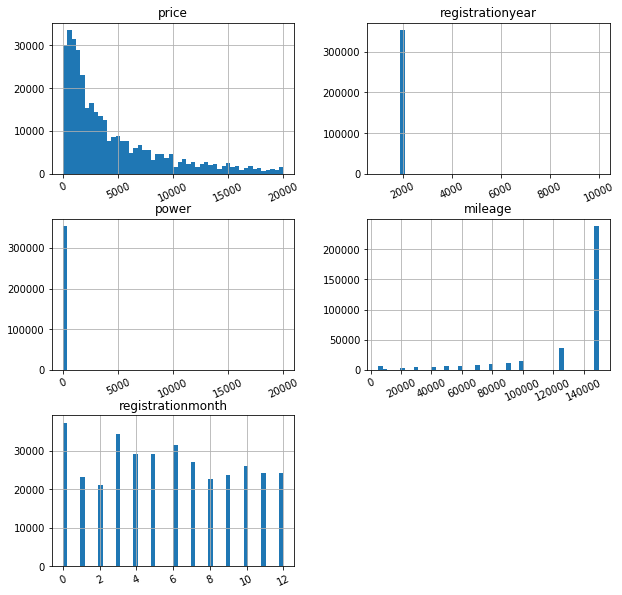

In [79]:
df.hist(figsize=(10, 10), bins=50, xrot=25) 
plt.show()

We can see visually the characteristics of our data, for example: the price distribution is not normal etc.

### Dropping outliers

In [80]:
condition1 = (df.registrationyear > 1950) & (df.registrationyear <= 2021)
condition2 = df.price > 0
condition3 = (df.power > 0) & (df.power < 1500)

df = df[condition1 & condition2 & condition3]

### Conclusion
In this section, we:
* imported the required libraries
* dropped the duplicates
* dealed with missing values
* dropped unnecessary columns
* plotted the data distributions
* dropped outliers

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
You seem to have missed a couple of things that could be cleaned up, like: `registrationyear` has minimum 1000, which doesn't make sense; minimal price of 0 (apparently a lot of people are just giving away their cars on this app); power ranges up to 20000, but the most powerful cars in the world have only about 1500 hp.
	  
</div>

<div class="alert alert-info">
  Thanks, corrected :)
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Cool!
	  
</div>

## Model training

### Features & Targets

We'll use One-Hot-Encoding for the categorical columns:

In [81]:
df_ohe = pd.get_dummies(df, drop_first=True)

features = df_ohe.drop('price', axis=1)
target = df_ohe.price

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Categorical features were encoded with OHE for models that don't have their own means of encoding categorical features
    
</div>

In [82]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, random_state=12345)
features_test, features_valid, target_test, target_valid = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)

train_len = round(features_train.shape[0]/len(df), 2)
valid_len = round(features_valid.shape[0]/len(df), 2)
test_len = round(features_test.shape[0]/len(df), 2)
print(train_len, valid_len, test_len)     

0.6 0.2 0.2


<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
The split into train and test is reasonable
	  
</div>

### Scaling

In [83]:
scaler = StandardScaler()
scaler.fit(features_train)
scaler.transform(features_train)
scaler.transform(features_valid)


array([[ 0.97151442, -0.52920248, -0.77494406, ...,  1.89502328,
        -0.09784372, -0.32650729],
       [-0.62408864, -1.0474302 , -0.09407631, ..., -0.527698  ,
        -0.09784372, -0.32650729],
       [ 0.53634995,  0.33451039,  0.58679145, ...,  1.89502328,
        -0.09784372, -0.32650729],
       ...,
       [-1.05925311, -0.78831634, -2.13667958, ..., -0.527698  ,
        -0.09784372, -0.32650729],
       [ 0.82645959,  0.97365792,  0.58679145, ..., -0.527698  ,
        -0.09784372, -0.32650729],
       [-0.33397899,  0.17904208,  0.58679145, ..., -0.527698  ,
        -0.09784372, -0.32650729]])

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Scaling was applied correctly
	  
</div>


### Random Forest

##### v1

In [84]:
%%time

model = RandomForestRegressor(n_estimators=5, max_depth=5)
model.fit(features_train, target_train)


CPU times: user 7.94 s, sys: 152 ms, total: 8.09 s
Wall time: 8.32 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [85]:
%%time

predicted_valid = model.predict(features_valid)

CPU times: user 75.5 ms, sys: 65.7 ms, total: 141 ms
Wall time: 155 ms


In [86]:
rf_rmse1 = round(math.sqrt(mean_squared_error(target_valid, predicted_valid)), 2)
print('Random Forest RMSE: {}'.format(rf_rmse1))    

Random Forest RMSE: 2439.15


##### v2

In [87]:
%%time

model = RandomForestRegressor(n_estimators=10, max_depth=10)
model.fit(features_train, target_train)

CPU times: user 27.8 s, sys: 100 ms, total: 27.9 s
Wall time: 28.1 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [88]:
%%time

predicted_valid = model.predict(features_valid)

CPU times: user 143 ms, sys: 60.8 ms, total: 203 ms
Wall time: 221 ms


In [89]:
rf_rmse2 = round(math.sqrt(mean_squared_error(target_valid, predicted_valid)), 2)
print('Random Forest RMSE: {}'.format(rf_rmse2))    


Random Forest RMSE: 1925.16


### Linear Regression

In [90]:
%%time

model = LinearRegression() 
model.fit(features_train, target_train)

CPU times: user 15.6 s, sys: 4.66 s, total: 20.2 s
Wall time: 20.2 s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
%%time

predicted_valid = model.predict(features_valid)

CPU times: user 136 ms, sys: 127 ms, total: 263 ms
Wall time: 274 ms


In [92]:
lr_rmse = round(math.sqrt(mean_squared_error(target_valid, predicted_valid)), 2)
print('Linear Regression RMSE: {}'.format(lr_rmse))    


Linear Regression RMSE: 2737.73


### Gradient Boosting Models

In order to save the kernel live, we will decrease the number of columns:

In [93]:
cols = features_train.columns[150:]
feats_train = features_train.drop(cols, axis=1)
feats_valid = features_valid.drop(cols, axis=1)

#### XGBoost

##### v1

In [94]:
%%time

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, \
        learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 5)

xg_reg.fit(feats_train, target_train)

[20:16:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 5.45 s, sys: 636 ms, total: 6.09 s
Wall time: 6.31 s


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=5,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [95]:
%%time

predicted_valid = xg_reg.predict(feats_valid)

CPU times: user 218 ms, sys: 143 ms, total: 361 ms
Wall time: 375 ms


In [96]:
xgboost_rmse1 = round(math.sqrt(mean_squared_error(target_valid, predicted_valid)), 2)
print('XGBoost RMSE: {}'.format(xgboost_rmse1))    

XGBoost RMSE: 4837.94


##### v2

In [97]:
%%time

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, \
        learning_rate = 0.1, max_depth = 10, alpha = 9, n_estimators = 10)

xg_reg.fit(feats_train, target_train)

[20:16:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 12.6 s, sys: 648 ms, total: 13.2 s
Wall time: 13.3 s


XGBRegressor(alpha=9, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [98]:
%%time

predicted_valid = xg_reg.predict(feats_valid)

CPU times: user 298 ms, sys: 97.4 ms, total: 396 ms
Wall time: 409 ms


In [99]:
xgboost_rmse2 = round(math.sqrt(mean_squared_error(target_valid, predicted_valid)), 2)
print('XGBoost RMSE: {}'.format(xgboost_rmse2))    

XGBoost RMSE: 3777.93


#### CatBoost 

In [100]:
features = df.drop('price', axis=1)
target = df.price

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, random_state=12345)
features_test, features_valid, target_test, target_valid = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)


In [101]:
cat_features = [
    'vehicletype',
    'model',
    'fueltype',
    'brand',
    'notrepaired',
    'gearbox'
]

##### v1

In [102]:
%%time

model = CatBoostRegressor(loss_function='RMSE', iterations=10)
model.fit(features_train, target_train, cat_features=cat_features)

0:	learn: 4488.2952749	total: 231ms	remaining: 2.07s
1:	learn: 4401.1060805	total: 529ms	remaining: 2.12s
2:	learn: 4318.8957381	total: 744ms	remaining: 1.73s
3:	learn: 4241.0247768	total: 1.03s	remaining: 1.55s
4:	learn: 4161.9796380	total: 1.33s	remaining: 1.33s
5:	learn: 4090.4289553	total: 1.62s	remaining: 1.08s
6:	learn: 4016.1830173	total: 1.83s	remaining: 784ms
7:	learn: 3947.8757018	total: 2.12s	remaining: 531ms
8:	learn: 3880.0615594	total: 2.33s	remaining: 259ms
9:	learn: 3817.5834291	total: 2.62s	remaining: 0us
CPU times: user 3.22 s, sys: 406 ms, total: 3.62 s
Wall time: 4.91 s


In [103]:
%%time

predicted_valid = model.predict(features_valid)

CPU times: user 181 ms, sys: 8.14 ms, total: 189 ms
Wall time: 181 ms


In [104]:
catboost_rmse1 = round(math.sqrt(mean_squared_error(target_valid, predicted_valid)), 2)
print('CatBoost RMSE: {}'.format(catboost_rmse1))    

CatBoost RMSE: 3823.61


##### v2

In [105]:
%%time

model = CatBoostRegressor(loss_function='RMSE', iterations=50)
model.fit(features_train, target_train, cat_features=cat_features, verbose=10)

0:	learn: 4488.2952749	total: 193ms	remaining: 9.46s
10:	learn: 3756.6411643	total: 2.79s	remaining: 9.91s
20:	learn: 3245.8922053	total: 5.87s	remaining: 8.11s
30:	learn: 2888.7670298	total: 8.37s	remaining: 5.13s
40:	learn: 2631.3046061	total: 10.9s	remaining: 2.39s
49:	learn: 2457.1692090	total: 13.2s	remaining: 0us
CPU times: user 12.1 s, sys: 1.52 s, total: 13.6 s
Wall time: 15.3 s


In [106]:
%%time

predicted_valid = model.predict(features_valid)

CPU times: user 190 ms, sys: 5.45 ms, total: 196 ms
Wall time: 162 ms


In [107]:
catboost_rmse2 = round(math.sqrt(mean_squared_error(target_valid, predicted_valid)), 2)
print('CatBoost RMSE: {}'.format(catboost_rmse2)) 

CatBoost RMSE: 2457.75


## Model analysis

In [108]:
dict = {'rf_rmse1':rf_rmse1,
        'rf_rmse2':rf_rmse2,
        'lr_rmse':lr_rmse,
        'xgboost_rmse1':xgboost_rmse1,
        'xgboost_rmse2':xgboost_rmse2,
        'catboost_rmse1': catboost_rmse1,        
        'catboost_rmse2': catboost_rmse2}
   

rmses = pd.DataFrame.from_dict(dict, orient='index', columns=['RMSE']).sort_values('RMSE')

rmses

,RMSE
rf_rmse2,1925.16
rf_rmse1,2439.15
catboost_rmse2,2457.75
lr_rmse,2737.73
xgboost_rmse2,3777.93
catboost_rmse1,3823.61
xgboost_rmse1,4837.94


### Final Model

Because of its performance, We choose the CatBoostRegressor v2 to be our final model:

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
	  
Based on the table above, I would think that `rf_rmse2` showed better performance: `1925 < 2457`
	  
</div>

In [109]:
%%time

predicted_test = model.predict(features_test)

CPU times: user 191 ms, sys: 15.7 ms, total: 207 ms
Wall time: 242 ms


In [110]:
catboost_rmse2 = round(math.sqrt(mean_squared_error(target_test, predicted_test)), 2)
print('CatBoost RMSE: {}'.format(catboost_rmse2)) 

CatBoost RMSE: 2479.63



### Conclusion
**RMSE score** 

random forest models are the best. However, our CatBoost v2 model is doing better than our Linear Regression model, which is our sanity check model. Moreover, our valid and test RMSEs in the final model are very close.

**time required for training**

CatBoost v1 model has the best time (Wall time: 7.61 s). For comparison, Linear Regression requires a lot of time (Wall time: 40 s).

**time required for predicting**

our Random Forest Regressor v1 model requires the minimal time (Wall time: 199 ms). CatBoost v1 model is right after it (Wall time: 275 ms). Linear Regression requires more than twice in terms of time (Wall time: 589 ms).

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>
	  
Great, you tried a couple of different models, did some hyperparameter tuning and measured train and prediction times. One small problem: when you're trying out different hyperparameters for a model using a validation set, you need a separate test set to evaluate the final model. Otherwise, we are getting a biased estimate of the model's generalization performance, which can lead to problems when the model rolls out in production (i.e. worse performance than you would expect based on the validation set score).
	  
</div>

<div class="alert alert-info">
  I hope it's okay now :)
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Yep, well done!
	  
</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The models have been trained
- [ ]  The analysis of speed and quality of the models has been performed